![title](images/fgv_logo_novo.jpg)

# Aula 5: REVISÃO algebra linear 

**COM Python**

O objetivo desse notebook é relembrar os principais resultados de algebra linear pertinentes ao entendimento de técnicas populares em Machine Learning. 

Demonstrações e formalismos não estão presentes, e referencias externas como livros e links são apresentados como complemento.

\begin{equation}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
\newcommand{\vectorproj}[2][]{\textit{proj}_{\vect{#1}}\vect{#2}}
\newcommand{\vect}{\mathbf}
\end{equation}

\begin{equation}
\newcommand{\vertbar}{\vrule[-1ex]{0.5pt}{2.5ex}}
\newcommand{\horzbar}{\rule[.5ex]{2.5ex}{0.5pt}}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig_size = (8, 5)
plt.rcParams["figure.figsize"] = fig_size

%matplotlib inline

### uma introdução muito rápida de numpy

numpy é a biblioteca python utilizada para operações de vetores e matrizes. Diferentemente de pandas, não há o conceito de indices em linhas e colunas que não sejam numeros inteiros e em sequencia. Ou seja, indexações, slicings em numpy somente via numeros inteiros que denotam o numero da linha e o numero da coluna em sequencia começando do $0$.

In [2]:
# definindo um vetor de 16 dimensões
a = np.linspace(0, 15, 16)

In [3]:
# reshape numa matriz 4 x 4
a.reshape(4,4)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [4]:
# reshape num tensor 2 x 2 x 4
a.reshape(2,2,4)

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]],

       [[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]])

In [5]:
# reshape num tensor 4 x 2 x 2
a.reshape(4,2,2)

array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[ 4.,  5.],
        [ 6.,  7.]],

       [[ 8.,  9.],
        [10., 11.]],

       [[12., 13.],
        [14., 15.]]])

## aqui começa algebra linear...

In [6]:
def plt_vecs(*vecs, colors, line = None, line_col = 'grey'):

    vecs = np.array(vecs).T
    # print(vecs)
    offset = 0.005
    for v_idx in range(vecs.shape[1]):
        offset = (-1) * offset 
        plt.quiver([0], [0 - offset], vecs[0, v_idx], vecs[1, v_idx] - offset, color = colors[v_idx],           
               angles='xy', scale_units='xy', scale=1)

    x_max, y_max = np.ceil(np.abs(vecs).max(axis = 1)).astype(int) + 1
    
    if line:
        x = np.arange(-x_max, x_max, 2 * x_max/10)
        a = (line[1][1] - line[0][1]) / (line[1][0] - line[0][0])
        b = line[0][1] - line[0][0] * a
        y = a * x
        plt.plot(x, y, dashes = [6, 2], linewidth=0.8, color = line_col, alpha = 0.5)
        
    plt.xlim(-x_max, x_max)
    plt.ylim(-y_max, y_max)
    plt.xticks(range(-x_max, x_max + 1))
    plt.yticks(range(-y_max, y_max + 1))
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    

### vetores e matrizes

#### projeção de vetores

Calcular a projeção $\vectorproj[r]{a}$ do vetor $\mathbf{a} = (2,1)$ sobre o vetor $\mathbf{r} = (1, 1)$:

O tamanho da projeção de $\vect{a}$ sobre $\vect{r}$ em *unidades* de $\norm{\vect{r}}$ é dada por:

\begin{equation} 
\frac{\mathbf{a} \cdot \mathbf{r}}{\norm{\mathbf{r}}^2} = 
\frac{2.1 + 1.1}{1^2 + 1^2} = 
\frac{3}{2}
\end{equation}

A projeção:
\begin{equation} 
\vectorproj[r]{a} =
\frac{\mathbf{a} \cdot \vect{r}}{\norm{\vect{r}}^2} \vect{r} = 
\frac{2.1 + 1.1}{1^2 + 1^2} 
  \begin{bmatrix}
      1 \\
      1 
  \end{bmatrix}
=
\frac{3}{2}
  \begin{bmatrix}
      1 \\
      1 
  \end{bmatrix}
\end{equation}


O tamanho da projeção de $\vect{a}$ sobre $\vect{r}$ em *unidades* da *base canonica* é dada por:

\begin{equation} 
\frac{\mathbf{a} \cdot \mathbf{r}}{\norm{\mathbf{r}}} = 
\frac{2.1 + 1.1}{\sqrt{1^2 + 1^2}} = 
\frac{3}{\sqrt{2}}
\end{equation}



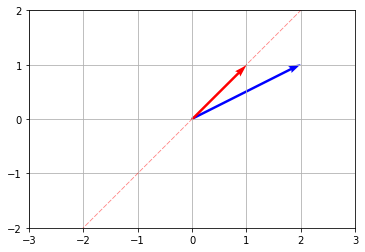

In [7]:
a = np.array([2, 1])
r = np.array([1, 1]) 
plt_vecs(a, r, colors = ['b', 'r'], line = [(0,0), (1,1)], line_col = 'r')

[1.5 1.5]


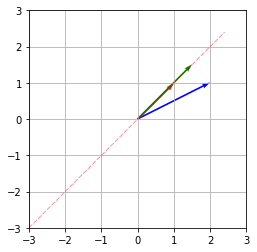

In [8]:
proj_r_a = (np.dot(a, r)/np.dot(r, r)) * r
print(proj_r_a)
plt_vecs(a, r, proj_r_a, colors = ['b', 'r', 'g'], line = [(0,0), (1,1)], line_col = 'r')

[1.5 1.5]


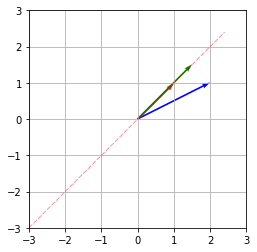

In [9]:
proj_r_a = (a @ r)/(r @ r) * r # operador @ : produto entre vetores (ou matrizes)
print(proj_r_a)
plt_vecs(a, r, proj_r_a, colors = ['b', 'r', 'g'], line = [(0,0), (1,1)], line_col = 'r')

### rank de uma matriz

O rank de uma matriz é a quantidade de vetores linearmente independentes do espaço coluna.<br>
O rank de uma matriz é a quantidade de vetores linearmente independentes do espaço linha. <br>
... e sim, as duas quantidades são iguais.

### multiplicação de matrizes - transformação linear
Aqui vamos entender multiplicação de matrizes como uma transformação linear.

In [12]:
def get_coords_color(a_img):
    
    x = list()
    y = list()
    c = list()
    
    width  = a_img.width 
    height = a_img.height 

    for x_idx in range(width):
        for y_idx in range(height):
            x.append(x_idx - width // 2)
            y.append(height - y_idx - height // 2)
            rgb = np.array(a_img.getpixel((x_idx, y_idx))) / 255
            c.append(rgb)
    
    return x, y, c

def plt_img(x_coords, y_coords, colors, ax = None, lims = None):
    if ax is None:
        out = plt.scatter(x_coords, y_coords, s = 1, facecolors = colors)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        plt.xlim(lims)
        plt.ylim(lims)
        plt.show()
    else:
        out = ax.scatter(x_coords, y_coords, s = 1, facecolors = colors)
        # plt.gca().set_aspect('equal', adjustable='box')
        # ax.set_aspect('equal', adjustable='box')
        ax.set_aspect('equal')
        ax.grid(True)
        if lims is not None:
            ax.set_xlim(lims)
            ax.set_ylim(lims)
            
    return out

In [13]:
import os
img_dir = './images'
img_fn  = 'fluminense.jpg'
img_fn  = 'fluminense.png'

flu = os.path.join(img_dir, img_fn)

In [14]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img = Image.open(flu).convert("RGB")

# realize um crop da imagem, caso tenha espaços laterais, superiores ou inferiores
# img = img.crop(box = (200, 10, 833 - 200, 521 - 10))

# realize um resize da imagem, para diminuir a resolucão
img = img.resize((img.width//2, img.height//2),Image.ANTIALIAS)

# transforme a imagem num ndarray
# imgarr = np.array(img) 

print('dimensões(m, n):', img.width, img.height)

dimensões(m, n): 131 150


Nesse exemplo vamos carregar uma imagem, a qual será centralizada na origem. Imagine varios vetores, um para cada pixel da imagem. 
Ou seja, o vetor parte da origem e vai até um pixel colorido da imagem. 


* **x** contém as coordenadas de cada pixel do eixo-x
* **y** contém as coordenadas de cada pixel do eixo-y
* **cor** contém as cores de cada pixel

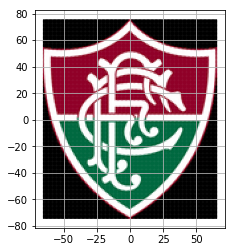

In [15]:
x, y, cor = get_coords_color(img)
plt_img(x, y, cor);

Agora montamos a matriz $\vect{V}$ contendo todos os vetores $\vect{v}_1, \vect{v}_2, ..., \vect{v}_{m.n}$ em suas colunas. 

In [16]:
V = np.array([x, y])

Em seguida, multiplicamos essa matriz $\vect{V}$ pela matriz $\vect{A}$ pela esquerda, ou seja:


\begin{equation} 
\vect{A}\vect{V} = 
  \begin{bmatrix}
    \Big| & \Big| & & \Big|\\
    \vect{A}\vect{v}_1 & \vect{A}\vect{v}_2 & \ldots & \vect{A}\vect{v}_{m.n} \\
    \Big| & \Big| & & \Big| 
  \end{bmatrix}
\end{equation}

ou seja, cada ponta do vetor (pixel) foi deslocado para um outro lugar no plano. <br>
Por exemplo, se:

\begin{equation}
\vect{A} =
  \begin{bmatrix}
      3 & 2 \\
      2 & 4 
  \end{bmatrix} \qquad
\vect{v}_1 = 
  \begin{bmatrix}
      40 \\
      5 
  \end{bmatrix} 
\end{equation}

\begin{equation}
\vect{A}\vect{v}_1 = 
  \begin{bmatrix}
      130 \\
      100 
  \end{bmatrix} 
\end{equation}

verifique com: ```A @ np.array([40,5])```

In [17]:
A = np.array([[ 3, 2], 
              [ 2, 4]])

# Experimente:
# A = np.array([[ 1, 2], [ 1, 2]])
# A = np.array([[ 3, 2], [ 0, 3]]) # não diagonalizavel

A_V = A @ V

Agora vamos ver o efeito dessa transformação em todos os vetores da matriz $
\vect{V}$, ou seja todos os pixels da imagem.

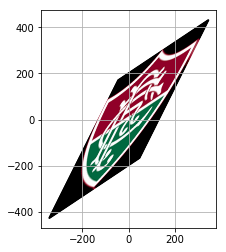

In [18]:
plt_img(A_V[0], A_V[1], cor)

##### Experimente:

1. alterar a matriz $\vect{A}$, por exemplo o elemento $a_{1,2}$, o superior direito.
2. aumente e diminua seu valor
3. aumente o valor até o limite da matriz $\vect{A}$ se tornar singular, ou seja o determinante $\vert\vect{A}\vert = 0$ (\*)
4. torne o determinante negativo

(\*) Nessa situação veja que a imagem se torna uma reta. Ou seja todos os vetores ficam alinhados sobre essa reta, e a matriz $\vect{A}$ é uma matriz de projeção. Veja também que  $\vect{A}^2 = \vect{A}$, ou a projeção de um vetor que já está reta, é o próprio vetor.

##### Experimente (shear):

1. uma transformação mais simples, como: ```np.array([[ 3, 2],[ 0, 4]])```
2. ```np.array([[ 3, 0],[ 2, 4]])```

##### Experimente (rotação):

1. ```np.array([[ 0, -1],[1, 0]])```
2. ```np.array([[ np.cos(theta), -np.sin(theta)],[ np.sin(theta), np.cos(theta)]])``` (\*\*)

(\*\*) Repare que, $\vect{R}$ como uma matriz de rotação, temos $\vect{R}\vect{R^T} = \vect{I}$, ou 
$\vect{R^T} = \vect{R}^{-1}$. <br>
As colunas de $\vect{R}$ são vetores ortonormais, e a matriz $\vect{R}$ é uma matriz ortonormal.

Em duas dimensões a matriz de rotação pode ser expressa como uma função de $\theta$, angulo medido no sentido anti-horario. A matriz $\vect{R}$ será:

\begin{equation}
\vect{R} =
  \begin{bmatrix}
      \cos\theta & -\sin\theta \\
      \sin\theta & \cos\theta 
  \end{bmatrix} 
\end{equation}

Notar que, o problema de rotacionar uma imagem em $\theta$ é equivalente a rotacionar os eixos em $-\theta$. 
Nesse caso, a matriz seria a transposta da matriz acima, $\vect{R^T}$. 

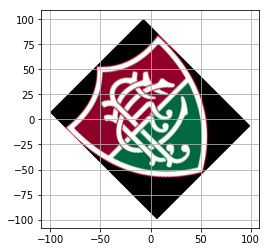

In [19]:
angulo = 45
theta = angulo * 2 * np.pi / 360

R = np.array([[ np.cos(theta), -np.sin(theta)],[ np.sin(theta), np.cos(theta)]])

R_V = R @ V

plt_img(R_V[0], R_V[1], cor);

In [20]:
print(R @ R.T)
print(R @ np.linalg.inv(R))

[[1. 0.]
 [0. 1.]]
[[1.00000000e+00 1.01465364e-17]
 [1.01465364e-17 1.00000000e+00]]


#### Matriz de projeção

Se $\vect{q}$ é um vetor unitário, a matriz definida por $\vect{q}\vect{q^T}$ define uma transformacão linear que corresponde a projeção sobre o vetor $\vect{q}$. <br>Vejamos

In [21]:
q = np.array([1,2])

# notar o abaixo resulta no produto interno, já que q.shape é (2,)
# q @ q.T 

q = q.reshape(-1, 1) # aqui fazemos um reshape. r passa a ter shape (2,1)

In [22]:
q = q / np.linalg.norm(q, 2) # normalizando pela norma L2

Agora montamos a matriz $\vect{\Phi_1}$ como $\vect{q}\vect{q^T}$. Essa matriz tem rank 1.

In [23]:
Phi1 = q @ q.T # Q1 tem shape (2,2)
Phi1

array([[0.2, 0.4],
       [0.4, 0.8]])

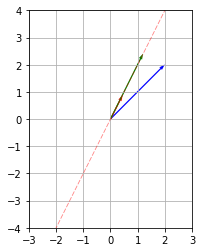

In [24]:
v = np.array([2, 2])
plt_vecs(v, q.ravel(), Phi1 @ v, colors = ['b', 'r', 'g'], line = [(0,0), (1,2)], line_col = 'r')

#### Mais sobre projeção...
*(... preparando o terreno para entender PCA)*

Se montarmos uma base ortonormal $\vect{q_1}, \vect{q_2}, \vect{q_3}$ como colunas de uma matriz $\vect{Q}$:



\begin{equation}
\vect{Q} = 
  \begin{bmatrix}
    \Big| & \Big| & \Big| \\
    \vect{q_1} & \vect{q_2} &  \vect{q_3} \\
    \Big| & \Big| & \Big| 
  \end{bmatrix}
\end{equation}

A matriz $\vect{\Phi} = \vect{Q}\vect{Q^T}$, pode ser expressa como a soma de tres matrizes de rank 1:

\begin{equation}
\begin{split}
\vect{\Phi} & =   \vect{Q}\vect{Q^T} \\
            & =  \vect{q_1}\vect{q_1^T} + \vect{q_2}\vect{q_2^T} + \vect{q_3}\vect{q_3^T}
\end{split}
\end{equation}

um vetor $\vect{v}$ multiplicado por $\vect{\Phi}$, resulta no proprio $\vect{v}$: $\vect{v^T}\vect{Q}\vect{Q^T} = \vect{v^T}$

Agora pense numa soma truncada em $k = 2$, ou seja somente os primeiros dois termos:

\begin{equation}
\vect{\Phi_2} =  \vect{q_1}\vect{q_1^T} + \vect{q_2}\vect{q_2^T}
\end{equation}

Nesse caso, a multiplicação de $\vect{v}$ por $\vect{\Phi_2}$, 

\begin{equation}
\vect{v^T} \vect{\Phi_2} =  \vect{v^T} \vect{q_1}\vect{q_1^T} + \vect{v^T} \vect{q_2}\vect{q_2^T}
\end{equation}

resulta na projeção sobre o plano definido por $\vect{q_1}$ e $\vect{q_2}$. 

Veja:
* $\vect{v^T} \vect{q_1}$ : tamanho da projeção de $\vect{v}$ sobre $\vect{q_1}$
* $\vect{v^T} \vect{q_1}\vect{q_1^T}$ : projeção de $\vect{v}$ sobre $\vect{q_1}$ (o vetor)
* $\vect{v^T} \vect{q_1}\vect{q_1^T} + \vect{v^T} \vect{q_2}\vect{q_2^T}$ : vetor soma das projeções de $\vect{v}$ em $\vect{q_1}$ e $\vect{q_2}$.

### autovalores e autovetores

Vimos anteriormente que os vetores $\vect{v}$ sofrem um deslocamento ao sofrerem uma transformação linear  causada por $\vect{A}$. <br>
Ou seja, $\vect{v} \rightarrow \vect{A}\vect{v}$

Contudo, existem alguns vetores $\vect{r}$ que ao sofrerem transformação linear são deslocados na mesma direção. <br>
Ou seja, $\vect{r} \rightarrow \vect{A}\vect{r}$, onde $\vect{r}$ e $\vect{A}\vect{r}$ tem a mesma direção.

Podemos então descrever esse comportamento como:

\begin{equation} 
\vect{A}\vect{r} = \lambda \vect{r} \qquad \lambda \in \mathbb{R}
\end{equation}

Assim, denominamos:
* $\vect{r}$: autovetores de $\vect{A}$
* $\lambda$: autovalores de $\vect{A}$

Notar que não estamos interessados na solução $\vect{r} = \vect{0}$

Podemos encontrar $\lambda$ e  $\vect{r}$ via:

\begin{equation} 
(\vect{A} - \lambda\vect{I})\vect{r} = \vect{0}
\end{equation}

onde inicialmente vamos buscar os valores de $\lambda$ que tornam 
$\big\lvert \vect{A} - \lambda\vect{I} \big\rvert = 0$, justamente os valores de $\lambda$ que fazem com que a matriz $(\vect{A} - \lambda\vect{I})$ seja singular. 

Na prática precisamos resolver:

\begin{equation} 
p(\lambda) = \big\lvert \vect{A} - \lambda\vect{I} \big\rvert = 0
\end{equation}

onde $p(\lambda)$ é chamado polinomio característico.

Exemplo:

\begin{equation}
\vect{A} =
  \begin{bmatrix}
      3 & 3.75 \\
      1 & 4 
  \end{bmatrix} \qquad
\end{equation}



\begin{equation}
\begin{split}
p(\lambda) & = 
  \begin{vmatrix}
      3 - \lambda & 3.75 \\
      1 & 4 - \lambda
  \end{vmatrix} = 0 \\
& = (3 - \lambda)(4 - \lambda) - 3.75 = 0\\
& = \lambda^2 - 7\lambda + 8.25 = 0 \\
\end{split}
\end{equation}

vamos achar as raízes $\lambda_1$ e $\lambda_2$ desse polinomio.

In [25]:
a = 1; b = -7; c = 8.25
d = b**2 - 4*a*c
lbd_1, lbd_2 = (-b + np.sqrt(d))/(2*a), (-b - np.sqrt(d))/(2*a)
print('os autovalores são:', round(lbd_1, 3), round(lbd_2, 3))

os autovalores são: 5.5 1.5


agora vamos calcular os autovetores $\vect{r}_1$ e $\vect{r}_2$.

* para $\lambda_1 = 5.5$, temos
\begin{equation}
\vect{A}.\vect{r}_1 =
  \begin{bmatrix}
      3 - 5.5 & 3.75 \\
      1 & 4 - 5.5
  \end{bmatrix}.
    \begin{bmatrix}
      r_{1,1} \\
      r_{2,1}
  \end{bmatrix} =
  \begin{bmatrix}
      - 2.5 & 3.75 \\
      1 & -1.5
  \end{bmatrix}.
    \begin{bmatrix}
      r_{1,1} \\
      r_{2,1}
  \end{bmatrix} = 0
\end{equation}

\begin{equation}
r_{1,1} = 1.5 r_{2,1} \quad \text{ou} \quad
\vect{r}_1 = c_1 
  \begin{bmatrix}
      1.5 \\
      1
  \end{bmatrix}
\end{equation} 

* para $\lambda_2 = 1.5$, temos
\begin{equation}
\vect{A}.\vect{r}_1 =
  \begin{bmatrix}
      3 - 1.5 & 3.75 \\
      1 & 4 - 1.5
  \end{bmatrix}.
    \begin{bmatrix}
      r_{1,2} \\
      r_{2,2}
  \end{bmatrix} =
  \begin{bmatrix}
      1.5 & 3.75 \\
      1 & 2.5
  \end{bmatrix}.
    \begin{bmatrix}
      r_{1,2} \\
      r_{2,2}
  \end{bmatrix} = 0
\end{equation}

\begin{equation}
r_{1,2} = - 2.5 r_{2,2} \quad \text{ou} \quad
\vect{r}_2 = c_2 
  \begin{bmatrix}
      - 2.5 \\
      1
  \end{bmatrix}
\end{equation} 

$c_1, c_2$ são escalares.  $c_1, c_2 \in \mathbb{R}$.<br>
Além disso, ao variar $c_1, c_2$ vamos gerar os *autoespaços*, definidos pelos diversos autovetores $\vect{r}_1, \vect{r}_2$.

vamos conferir esses autovetores e as transformações lineares, no plano.

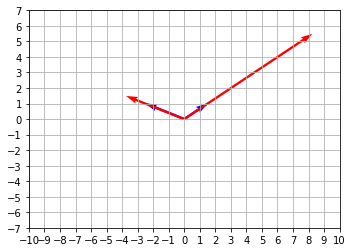

In [26]:
A = np.array([[ 3, 3.75], 
              [ 1, 4]])
r1, r2 = [1.5, 1], [-2.5, 1]

plt_vecs(r1, A @ r1, r2, A @ r2, colors = ['b', 'r', 'b', 'r'])

de fato, esses vetores são especiais. Eles não tem sua direcão alterada após a multiplicação por $\vect{A}$. <br>Contraste com um vetor generico $\vect{r_g}$, por exemplo 
$\begin{bmatrix}2  -2\end{bmatrix}^\text{T}$:

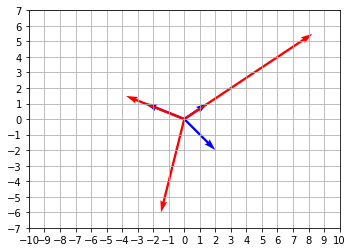

In [27]:
r_g = [2, -2] 
plt_vecs(r1, A @ r1, r2, A @ r2, r_g, A @ r_g, colors = ['b', 'r', 'b', 'r', 'b', 'r'])

O autovalor dominante será aquele que possui o maior valor absoluto. Nesse caso $\lambda_1 = 5.5$. Este corresponde ao autovalor que impõe a maior alteração no tamanho do autovetor, após a transformação.

#### obtendo autovalores e autovetores com numpy
```numpy``` permite calcular os autovalores e autovetores conforme a seguir:

In [28]:
import numpy as np

A = np.array([[ 3, 3.75], 
              [ 1, 4]])

In [29]:
lbd, R = np.linalg.eig(A)

In [30]:
print('autovalores:', lbd)
print('autovetores:\n', R)

autovalores: [1.5 5.5]
autovetores:
 [[-0.92847669 -0.83205029]
 [ 0.37139068 -0.5547002 ]]


note que nos resultados da função, os autovetores estão contidos nas colunas da matriz $\vect{R}$, em sua forma normalizada, $\norm{\vect{r}_1} = \norm{\vect{r}_2} = 1$

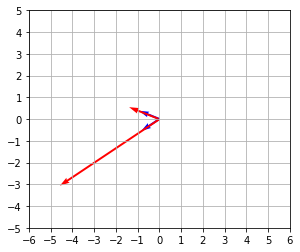

In [31]:
plt_vecs(R[:, 0], A @ R[:,0], R[:, 1], A @ R[:, 1], colors = ['b', 'r', 'b', 'r', ])

### eigendecomposition

Se $\vect{A} = \vect{A^T}$, os autovalores são reais e, podemos associar os autovetores ortonormais distintos para cada autovalor distinto. 

Assim, a matriz pode ser decomposta nos seguintes componentes:

\begin{equation}
\vect{A} = \vect{R} \vect{\Lambda} \vect{R^T}
\end{equation}

\begin{equation}
\vect{R} = 
  \begin{bmatrix}
    \Big| & \Big| & & \Big| \\
    \vect{r_1} & \vect{r_2} & \ldots & \vect{r}_n \\
    \Big| & \Big| & & \Big| 
  \end{bmatrix}
\end{equation}


\begin{equation}
  \vect{\Lambda} =
  \begin{bmatrix}
    \lambda_{1} & & &\\
    & \lambda_{2} &  &\\
    & & \ddots  &\\
    & & & \lambda_{n}
  \end{bmatrix}
\end{equation}

as colunas de $\vect{R}$ são ortonormais, ou seja $\vect{r^T}_k \vect{r}_j$ é igual a $1$ se $k = j$, ou $0$ caso contrário. <br>
Dizemos que a matriz $\vect{A}$ é diagonalizável, e também podemos re-escrever nesse formato: $\vect{\Lambda} = \vect{R}^{-1} \vect{A}  \vect{R}$

Se houverem autovalores com multiplicidade, estes geram autovetores que podem ser ortogonalizados. Ver [aqui](https://www.youtube.com/watch?v=oafswPUBICg&index=28&list=PLlXfTHzgMRUIqYrutsFXCOmiqKUgOgGJ5).

**Exemplo:**

Vamos checar para a seguinte matriz:
\begin{equation}
\vect{A} =
  \begin{bmatrix}
      3 & 2 \\
      2 & 4 
  \end{bmatrix} \qquad
\end{equation}



In [32]:
A = np.array([[ 3, 2], 
              [ 2, 4]])

# A = np.array([[ 2, 1], 
#               [ 1, 2]])

lbd, R = np.linalg.eig(A)

a decomposição produz a mesma matriz $\vect{A}$.

In [33]:
R @ np.diag(lbd) @ R.T # alternativamente: R @ (lbd * np.eye(2)) @ np.linalg.inv(R)

array([[3., 2.],
       [2., 4.]])

Vamos checar a atuação desses componentes, um por vez:
* $\vect{R^{T}}$
* $\vect{\Lambda}  \vect{R^{T}}$
* $\vect{R} \vect{\Lambda}  \vect{R^{T}}$

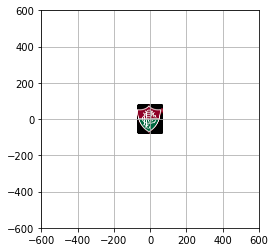

In [34]:
plt_img(V[0], V[1], cor, lims = (-600, 600))

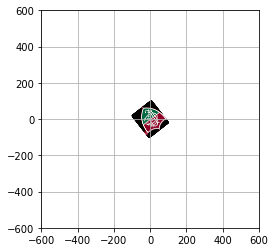

In [35]:
RT_V = R.T @ V
plt_img(RT_V[0], RT_V[1], cor, lims = (-600, 600))

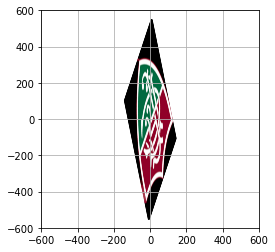

In [36]:
L = (lbd * np.eye(2)) # matriz diag a partir de um vetor
LRT_V = L @ R.T @ V
plt_img(LRT_V[0], LRT_V[1], cor, lims = (-600, 600))

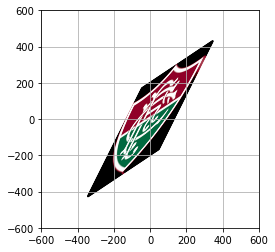

In [37]:
L = (lbd * np.eye(2)) # matriz diag a partir de um vetor
RLRT_V = R @ L @ R.T @ V
plt_img(RLRT_V[0], RLRT_V[1], cor, lims = (-600, 600));

A sequencia das tres operações acima equivale a...

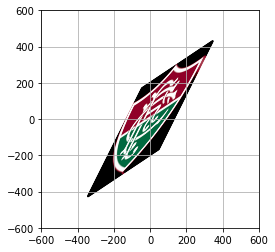

In [38]:
A_V = A @ V
plt_img(A_V[0], A_V[1], cor, lims = (-600, 600));

ver todas na sequencia abaixo, sendo as duas figuras a direita identicas.

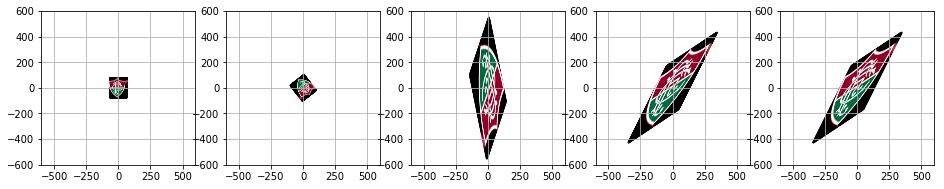

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,10))
lims = (-600, 600)
plt_img(V[0], V[1], cor, ax1, lims = lims);
plt_img(RT_V[0], RT_V[1], cor, ax2, lims = lims);
plt_img(LRT_V[0], LRT_V[1], cor, ax3, lims = lims);
plt_img(RLRT_V[0], RLRT_V[1], cor, ax4, lims = lims); #(*)
plt_img(A_V[0], A_V[1], cor, ax5, lims = lims);       #(*)

#(*) essas duas são identicas

Esse processo permite decompor $\vect{A}$ segundo: 

\begin{equation}
\vect{A} = \vect{R} \vect{\Lambda} \vect{R^T}
\end{equation}

\begin{equation}
\vect{A} =
  \begin{bmatrix}
      3 & 2 \\
      2 & 4 
  \end{bmatrix} = 
  \begin{bmatrix}
      -0.79 & -0.62 \\
      0.62 & -0.79
  \end{bmatrix}
    \begin{bmatrix}
      1.44 & 0 \\
      0 & 5.56
  \end{bmatrix}
    \begin{bmatrix}
      -0.79 & 0.62 \\
      -0.62 & -0.79
  \end{bmatrix}
\end{equation}


Ao multiplicarmos uma matriz diagonalizável por $\vect{x}$, podemos escrever


\begin{equation}
\begin{split}
\vect{A}\vect{x} & = \vect{R} \vect{\Lambda} \vect{R^T}\vect{x} \\
\vect{A}\vect{x} & = \lambda_{1} \vect{r}{\mathstrut}_{1}\vect{r}_{1}^{\text{T}}\vect{x} + 
                     \lambda_{2} \vect{r}{\mathstrut}_{2}\vect{r}_{2}^{\text{T}}\vect{x} + \ldots + 
                     \lambda_{n} \vect{r}{\mathstrut}_{n}\vect{r}_{n}^{\text{T}}\vect{x}\\
\end{split}
\end{equation}

que corresponde a combinação linear das projeções do vetor $\vect{x}$ nos autovetores, onde os coeficientes são os autovalores. <br>
Conforme vimos anteriormente, $\vect{r}{\mathstrut}_{k}\vect{r}_{k}^{\text{T}}\vect{x}$ é a projeção de $\vect{x}$ em $\vect{r}_{k}$.

In [40]:
A = np.array([[ 3, 2], 
              [ 2, 4]])

lbd, R = np.linalg.eig(A)

In [41]:
x = np.array([0.5, 0])

As duas figuras a seguir são identicas, <br>
a primeira obtendo o vetor pela multiplicação...

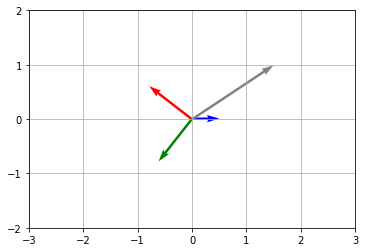

In [42]:
plt_vecs(x, R[:, 0], R[:, 1], A @ x, colors = ['b', 'r', 'g', 'grey'])

... e aqui pela combinação das projeções sobre os autovetores.

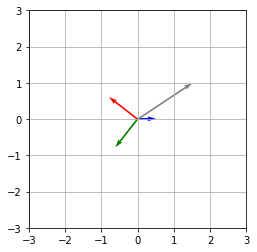

In [43]:
A_x = lbd[0] * R[:, 0].T @ x * R[:, 0] + lbd[1] * R[:, 1].T @ x * R[:, 1]
plt_vecs(x, R[:, 0], R[:, 1], A_x, colors = ['b', 'r', 'g', 'grey'])

### matriz simétrica e definida positiva 
Uma matriz simétrica e definda positiva (Symmetric Positive Definite Matrix) $\vect{C}$ é uma matriz simétrica que atende a condição:

\begin{equation}
f(\vect{v}) = \vect{v^T} \vect{C} \vect{v} > 0 
\end{equation}

para um vetor $\vect{v} \neq \vect{0}$. Se admitirmos a possibilidade de $f(\vect{v}) \geq 0$, $\vect{C}$ é denominada semidefinida positiva.

#### produto de uma matriz pela sua transposta

As matrizes $\vect{A^T}\vect{A}$ e $\vect{A}\vect{A^T}$ são simétricas. <br>
Além disso são definida positivas:

\begin{equation}
f(\vect{v}) = \vect{v^\text{T}} \vect{A^\text{T}} \vect{A} \vect{v} =  (\vect{A}\vect{v})^\vect{T} \vect{A} \vect{v} = 
\vect{y^\text{T}}\vect{y} > 0 
\end{equation}

desde que $\vect{v}$ não pertença ao espaço nulo de $\vect{A}$

## Singular Value Decomposition (SVD)

A matriz $\vect{A}$ de dimensões $n$ x $m$ pode ser expressa através da multiplicação das matrizes:

\begin{equation}
\vect{A} = \vect{U}\vect{\Sigma}\vect{V^\text{T}}
\end{equation}

Para achar os componentes, primeiramente vamos realizar a decomposicão de $\vect{A} \vect{A^\text{T}}$

\begin{equation}
\begin{split}
\vect{A} \vect{A^\text{T}} & = \vect{U} \vect{\Sigma} \vect{V^T} (\vect{U} \vect{\Sigma} \vect{V^T})^\vect{T}\\
                           & = \vect{U} \vect{\Sigma} \vect{V^T} \vect{V} \vect{\Sigma}^\vect{T} \vect{U}^\vect{T}   \\ 
                           & = \vect{U} \vect{\Sigma} \vect{\Sigma}^\vect{T} \vect{U}^\vect{T}   \\
                           & = \vect{U} \vect{\Sigma}^2 \vect{U}^\vect{T}   \\
                           \\
\vect{A^\text{T}} \vect{A} & = \vect{V} \vect{\Sigma}^2 \vect{V}^\vect{T}   \\
\end{split}
\end{equation}

Assim, com $\vect{A}_{[n \text{x} m]}$ temos:
* As colunas de $\vect{U}_{[n \text{x} r]}$ são chamadas de *left singular vectors* de $\vect{A}$, 
e correspondem aos autovetores de $\vect{A} \vect{A^\text{T}}$. <br>
* As colunas de $\vect{V}_{[m \text{x} r]}$ são chamadas de *right singular vectors* de $\vect{A}$,
e correspondem aos autovetores de $\vect{A^T}\vect{A}$. <br>
* $\Sigma_{[r \text{x} r]}$ contém os valores singulares da matriz $\vect{A}$ em sua diagonal principal, e são as raízes quadrada dos autovalores de $\vect{A} \vect{A^\text{T}}$ (somente aqueles diferentes de zero).

**Propriedades**
* SVD sempre existe, e é unica.
* $\vect{A} \vect{A^\text{T}}$ e $\vect{A^T}\vect{A}$ [possuem os mesmos autovalores](https://www.youtube.com/watch?v=M6_YiXDgBr0&list=PLlXfTHzgMRUIqYrutsFXCOmiqKUgOgGJ5&index=108).

Uma das aplicações práticas do SVD em Machine Learning consiste em "truncar" o valor de $r$ produzindo assim uma representação parcial (de rank $r$) da matriz original $\vect{A}$. <br>
Veja as figuras abaixo. ($n$ e $m$ estão invertidos)

![title](images/SVD_fig1.png) ![title](images/SVD_fig2.png)

Cada elemento da soma $\sigma_i \vect{u}_i \vect{v}_i$ é uma matriz com as mesmas dimensões de $\vect{A}$ de rank 1.

Propriedades:
* a quantidade de valores singulares $\sigma_i$ não nulos corresponde ao rank da matriz $\vect{A}$
* As primeiras $r$ colunas de $\vect{U}$ formam uma base ortonormal do espaço coluna de $\vect{A}$ <br>
  e as restantes $m - r$ colunas de $\vect{U}$ formam uma base ortonormal do espaço nulo de $\vect{A}$.
* As primeiras $r$ linhas de $\vect{V}$ formam uma base ortonormal do espaço linha de $\vect{A}$ <br>
  e as restantes $n - r$ colunas de $\vect{U}$ formam uma base ortonormal do espaço nulo de $\vect{A^T}$.

**Exemplo: obter a decomposição SVD com scipy**

In [44]:
from scipy.linalg import svd

In [45]:
A = np.array([[ 3, 2, 1], 
              [ 2, 4, 0],
              [ 1, 4, -1]])

U, S, Vt = svd(A)
U @ np.diag(S) @ Vt

array([[ 3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  4.00000000e+00,  3.05311332e-16],
       [ 1.00000000e+00,  4.00000000e+00, -1.00000000e+00]])

In [46]:
B = np.array([[ 3, 2, 1], 
              [ 2, 4, 0],
              [ 1, 4, -1],
              [-1,-4, 5]])
U, S, Vt = svd(B)
U[:,:3] @ np.diag(S) @ Vt

array([[ 3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  4.00000000e+00,  2.77555756e-17],
       [ 1.00000000e+00,  4.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -4.00000000e+00,  5.00000000e+00]])

In [47]:
B = np.array([[ 3, 2, 1, 2], 
              [ 2, 4, 0, 0]])
U, S, Vt = svd(B)
U @ np.diag(S) @ Vt[:2]
# print (U.shape, np.diag(S).shape, Vt.shape)

array([[3.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 1.04979341e-16, 2.09958681e-16]])

In [48]:
# np.allclose(A, U @ np.diag(S) @ Vt)

**Exemplo: obter a decomposição SVD truncada com scikit learn**

In [49]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
U_S = svd.fit_transform(A)

In [50]:
svd.inverse_transform(U_S)

array([[ 2.95678076,  2.02559198,  1.07092111],
       [ 2.09115445,  3.94602351, -0.14958093],
       [ 0.93263356,  4.03989058, -0.88945427]])

In [51]:
A - svd.inverse_transform(U_S)

array([[ 0.04321924, -0.02559198, -0.07092111],
       [-0.09115445,  0.05397649,  0.14958093],
       [ 0.06736644, -0.03989058, -0.11054573]])

### PCA

** matriz de covariancia**

In [52]:
import matplotlib.pyplot as plt
import numpy as np

mean = [0, 0]
cov = [[2, 0.8], [0.8, 0.6]]
size = 1000

np.random.seed(88)
M = np.random.multivariate_normal(mean, cov, size, ).T

# 'g' para os que contribuem positivamente para a covariancia e 'r' para os negativos
colors = ['g' if M[0, i] * M[1, i] > 0 else 'r' for i in range(size) ] 

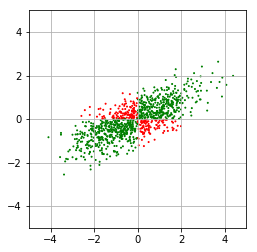

In [53]:
plt_img(M[0], M[1], colors = colors, lims = (-5, 5));

vamos calcular a matriz de covariancia das amostras

In [54]:
C = (M @ M.T)/(size - 1)
C

array([[1.96297555, 0.8058614 ],
       [0.8058614 , 0.60736087]])

Tentemos inicialmente girar 20 graus no sentido anti-horario.<br>
A variancia no eixo horizontal é aumentada, mas ainda não é a que maximiza a variancia.

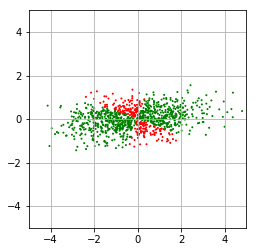

In [55]:
angulo = 20 # em graus. rotação dos *eixos*
theta = angulo * 2 * np.pi / 360

# V tem em suas colunas os vetores ortonormais (os novos eixos)
V = np.array([[ np.cos(theta), -np.sin(theta)],[ np.sin(theta), np.cos(theta)]])

# projeta cada ponto em M para esse novo eixo
V_M = V.T @ M

plt_img(V_M[0], V_M[1], colors = colors, lims = (-5, 5));

não é uma diagonalização perfeita...

In [56]:
(V.T @ C @ V).round(4)

array([[2.3224, 0.1816],
       [0.1816, 0.2479]])

Em realidade os eixos que correspondem a máxima variação, são justamente os autovetores da matriz de covariancia.

In [57]:
lbd, U = np.linalg.eig(C)

Os autovetores da matriz $\vect{U}$ correspondem aos componentes principais (PCs). Vejamos, quais são eles:

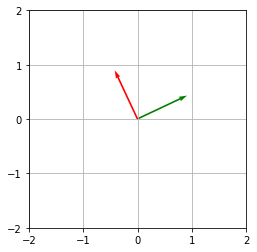

In [58]:
plt_vecs(U[:,0], U[:,1], colors = ['g', 'r'])

Através desse primeiro PC, vamos calcular o angulo de rotação. Este é o arcocoseno do primeiro elemento desse primeiro PC.<br>
Esse angulo de rotação do eixo, é o que captura a maxima variancia.

angulo de rotação: 24.97 graus


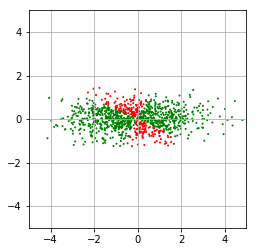

In [59]:
theta = angulo_em_rads =  np.arccos(U[0,0])
angulo = angulo_em_rads * 360 / (2 * np.pi) # em graus. rotação dos *eixos*

# angulo em graus
print("angulo de rotação:", angulo.round(2), "graus")

# V tem em suas colunas os vetores ortonormais (os novos eixos)
V = np.array([[ np.cos(theta), -np.sin(theta)],[ np.sin(theta), np.cos(theta)]])

# projeta cada ponto em M para esse novo eixo
V_M = V.T @ M

plt_img(V_M[0], V_M[1], colors = colors, lims = (-5, 5));

Agora sim, ...

In [60]:
(V.T @ C @ V)#.round(5)

array([[2.33818074e+00, 4.37395220e-17],
       [2.89402132e-17, 2.32155682e-01]])

______

______

### TODO's

### numpy
* indexing, slicing
* produto interno
* produto matriz vetor
* produto element-wise
* transposta

### Algebra linear
* matriz singular - determinante
* espaço nulo

### PCA
dedução: autovetores correspondem a maxima variação